# Regressão Logística

[Referência de bases de dados](https://sushtend.com/machine-learning/datasets-for-practicing-logistic-regression/)

[Base de dados utilizada](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

# Bibliografia

FACURE, Matheus - **Regressão Logística**. Disponível em: <https://matheusfacure.github.io/2017/02/25/regr-log/>. Acessado 7 de novembro de 2021.

TIBCO - **O que é regressão logística?**. Disponível em: <https://www.tibco.com/pt-br/reference-center/what-is-logistic-regression>. Acessado 7 de novembro de 2021.

In [3]:
dados = pd.read_excel("default of credit card clients.xls")

In [5]:
dados.head(5)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


<AxesSubplot:>

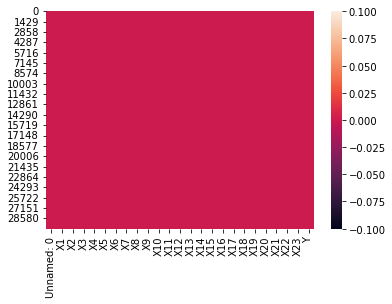

In [6]:
sns.heatmap(dados.isna())

In [16]:
dados.isna().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
X5            0
X6            0
X7            0
X8            0
X9            0
X10           0
X11           0
X12           0
X13           0
X14           0
X15           0
X16           0
X17           0
X18           0
X19           0
X20           0
X21           0
X22           0
X23           0
Y             0
dtype: int64

In [18]:
dados.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [20]:
dados.columns = dados.iloc[0]
dados

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [21]:
dados.drop(index=0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [410]:
x_real = dados.iloc[:,1:12]
x_real

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
1,20000,2,2,1,24,2,2,-1,-1,-2,-2
2,120000,2,2,2,26,-1,2,0,0,0,2
3,90000,2,2,2,34,0,0,0,0,0,0
4,50000,2,2,1,37,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0
29999,80000,1,3,1,41,1,-1,0,0,0,-1


In [411]:
y_real = dados.iloc[:,-1:]
y_real

,default payment next month
0,default payment next month
1,1
2,1
3,0
4,0
...,...
29996,0
29997,0
29998,1
29999,1


In [412]:
x_real = x_real.to_numpy()[1:]
y_real = y_real.to_numpy()[1:]

In [413]:
y_real

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=object)

In [414]:
x_real

array([[20000, 2, 2, ..., -1, -2, -2],
       [120000, 2, 2, ..., 0, 0, 2],
       [90000, 2, 2, ..., 0, 0, 0],
       ...,
       [30000, 1, 2, ..., -1, 0, 0],
       [80000, 1, 3, ..., 0, 0, -1],
       [50000, 1, 2, ..., 0, 0, 0]], dtype=object)

In [417]:
def sigmoide(x):
    x = x.astype(float)
    return (1/(1 + np.exp(-x )))


def valores_iniciais(m):
    W = np.zeros((m, 1)).astype(float)
    b = 0
    return W, b

def accuracy(y_previsto, y_real):
    y_previsto = np.squeeze(y_previsto).astype(float)
    y_real = np.squeeze(y_true).astype(float)
#     assert y_previsto.shape == y_real.shape
    y_previsto = np.array([1 if i > 0.5 else 0 for i in y_previsto])
    return 1 - np.sum(np.abs(y_previsto - y_real))/len(y_real)

def predict(X, W, b):
    Z = np.dot(W.T, X) + b
    Z = Z.astype(float)
    y_previsto = sigmoide(Z).astype(float)
    return y_previsto.astype(float)

def train(x_real, y_real, taxa_de_aprendizagem=0.01, iteracoes=1000):
    """
    X: shape of n x m (n features and m samples)
    y: shape 1 x m
    """
    x_real = x_real.astype(float)
    y_real = y_real.astype(float)
    
    n = x_real.shape[0]
    m = x_real.shape[1]
    W, b = valores_iniciais(n)
    #print(W)
#     assert W.shape == (n, 1)
#     assert Y.shape == (1, m)
    
    perdas = []
    for i in range(iteracoes):
        Z = np.dot(W.T, x_real) + b
        Z = Z.astype(float)
        #print(Z.shape)
        y_previsto = sigmoide(Z)
#         assert y_previsto.shape == (1, m)
        perda = -1/m * np.sum((y_real*np.log(y_previsto  + 0.000001) + ((1 - y_real))*np.log((1 - y_previsto + 0.000001))))

            
        perdas.append(perda)
        
        dW = np.dot(x_real, (y_previsto - y_real).T)/m
        db = np.mean(y_previsto - y_real)
        
        dW = dW.astype(float)
        db = db.astype(float)
        
        
        W -= taxa_de_aprendizagem*dW
        b -= taxa_de_aprendizagem*db
                   
    return {'W': W, 'b': b, 'loss': perdas}



X shape (11, 30000)
Y shape (1, 30000)


<ipython-input-417-575b393a723a>:3: RuntimeWarning: overflow encountered in exp
  return (1/(1 + np.exp(-x )))


accuracy 77.88%
13.997866666666852


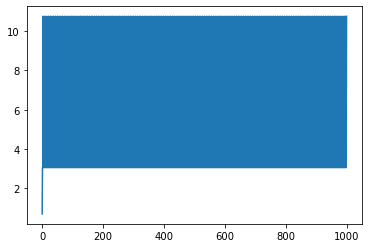

In [423]:
X_train = x_real
y_train = y_real

X = X_train.T
Y = y_train.reshape(1, -1)

print('X shape', X.shape)
print('Y shape', Y.shape)

model = train(X, Y, taxa_de_aprendizagem=0.2, iteracoes=1000)


W = model['W']
b = model['b']


y_previsto = predict(X_train.T, W, b)
y_true = y_train.reshape(1, -1)

acc = accuracy(y_previsto, y_true)
print('accuracy {:.2f}%'.format(acc*100))
pd.Series(model['loss']).plot()
print(model["W"][1,-1])
